### Fase 6. Reporte de resultados.

#### 0. Preparación de los datos

1. Importamos las librerías.

In [1]:
#Tratamiento de datos
import pandas as pd
import numpy as np
# -----------------------------------------------------------------------

#Visualización
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid') #establece el estilo del fondo de las gráficas como 'whitegrid'.
sns.set_theme(style='dark') #cambia el esquema de colores predeterminado de Seaborn a uno más oscuro. 
plt.style.use('fast') #cambia el estilo de gráfico. 
# --------------------------------------------------------

#Configuaración para poder visualizar todas las columnas de los DataFrames
pd.set_option('display.max_columns', None)

In [41]:
#Traemos el csv de la fase 2
url_data='https://raw.githubusercontent.com/s-armeni/proyecto-da-promo-H-modulo-3-team-3-DataMinds/main/hr_data_final.csv'
df_data=pd.read_csv(url_data, index_col=0)
df_data.head(1)

,Age,Attrition,Business_travel,Daily_rate,Distance_from_home,Education,Education_field,Employee_count,Employee_number,Environment_satisfaction,Gender,Hourly_rate,Job_involvement,Job_level,Job_role,Job_satisfaction,Marital_status,Monthly_rate,Num_companies_worked,Over_18,Over_time,Percent_salary_hike,Performance_rating,Relationship_satisfaction,Stock_option_level,Total_working_years,Training_times_last_year,Work_life_balance,Years_at_company,Years_since_last_promotion,Years_with_curr_manager,Date_birth,Remote_work
0,51,No,Unknown,684.0,6.0,3,Unknown,1.0,162,1,Male,51.0,3,5,Research director,3,Unknown,6462.0,7,Yes,No,13.0,3.0,3,0,11.32,5,3.0,20,15,15,1972,Yes


In [42]:
#Traemos los datos del csv con las medias de satisfacción
url_satisfaction='https://raw.githubusercontent.com/s-armeni/proyecto-da-promo-H-modulo-3-team-3-DataMinds/main/ab_testing.csv'
df_satisfaction=pd.read_csv(url_satisfaction)
df_satisfaction.head(1)

,Age,Attrition,Business_travel,Daily_rate,Distance_from_home,Education,Education_field,Employee_count,Employee_number,Environment_satisfaction,Gender,Hourly_rate,Job_involvement,Job_level,Job_role,Job_satisfaction,Marital_status,Monthly_rate,Num_companies_worked,Over_18,Over_time,Percent_salary_hike,Performance_rating,Relationship_satisfaction,Stock_option_level,Total_working_years,Training_times_last_year,Work_life_balance,Years_at_company,Years_since_last_promotion,Years_with_curr_manager,Date_birth,Remote_work,Employee_satisfaction,Group_test
0,51,No,Unknown,684.0,6.0,3,Unknown,1.0,162,1,Male,51.0,3,5,Research director,3,Unknown,6462.0,7,Yes,No,13.0,3.0,3,0,11.32,5,3.0,20,15,15,1972,Yes,2.33,B


In [43]:
#Unimos ambos csv para añadir la columna Employee_satisfaction para el reporte de resultados
# Reindexar df_satisfaction con Employee_number para asegurarnos de que los índices coincidan
df_satisfaction = df_satisfaction.set_index('Employee_number')
df_data = df_data.set_index('Employee_number')

# Concatenar la columna Employee_satisfaction de df_satisfaction al final de df_data
df_data['Employee_satisfaction'] = df_satisfaction['Employee_satisfaction']

# Resetear el índice si es necesario
df_report = df_data.reset_index()

In [44]:
df_report.head(1)

,Employee_number,Age,Attrition,Business_travel,Daily_rate,Distance_from_home,Education,Education_field,Employee_count,Environment_satisfaction,Gender,Hourly_rate,Job_involvement,Job_level,Job_role,Job_satisfaction,Marital_status,Monthly_rate,Num_companies_worked,Over_18,Over_time,Percent_salary_hike,Performance_rating,Relationship_satisfaction,Stock_option_level,Total_working_years,Training_times_last_year,Work_life_balance,Years_at_company,Years_since_last_promotion,Years_with_curr_manager,Date_birth,Remote_work,Employee_satisfaction
0,162,51,No,Unknown,684.0,6.0,3,Unknown,1.0,1,Male,51.0,3,5,Research director,3,Unknown,6462.0,7,Yes,No,13.0,3.0,3,0,11.32,5,3.0,20,15,15,1972,Yes,2.33


Hacemos un EDA inicial para conocer los datos (sabemos que no hay nulos ni duplicados porque los datos fueron tratados en fases anteriores, así que omitimos esa parte para hacer el análisis más breve).

In [46]:
#Creo una función que me servirá para los dos conjuntos de datos.
def exploratory_analysis(df):
    #Veo la información general
    print('General info:\n')
    df.info()
    print('\n--------------------------------\n')

    #Saco las estadísticas de las columnas categóricas y de las columnas numéricas
    #Puede ser que no haya ninguna columna categórica, así que las guardo en una lista y, si esa lista no tiene ninguna columna, imprimo un mensaje de que no existen columnas categóricas
    categorical_columns=df.select_dtypes(include='O').columns
    if len(categorical_columns) == 0:
        print(f'There are no categorical columns in the DataFrame.')
        print('\n--------------------------------\n')
        df_categorical_stats=None
    else:
        print("Categorical columns' statistics:")
        df_categorical_stats=df.describe(include='O').T
        display(df_categorical_stats)
        print('\n--------------------------------\n')

    #Saco las estadísticas de las columnas numéricas
    print("Numerical columns' statistics:")
    display(df.describe().T)
    print('\n--------------------------------\n')

    #Saco los valores únicos de cada columna
    for i in df.columns:
        total_value_count=df[i].value_counts().sum()
        print(f'Total unique values per column {i.upper()}: {total_value_count}')
        display(pd.DataFrame(df[i].value_counts()).head())

exploratory_analysis(df_report)

General info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1614 entries, 0 to 1613
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_number             1614 non-null   object 
 1   Age                         1614 non-null   int64  
 2   Attrition                   1614 non-null   object 
 3   Business_travel             1614 non-null   object 
 4   Daily_rate                  1614 non-null   float64
 5   Distance_from_home          1614 non-null   float64
 6   Education                   1614 non-null   int64  
 7   Education_field             1614 non-null   object 
 8   Employee_count              1614 non-null   float64
 9   Environment_satisfaction    1614 non-null   int64  
 10  Gender                      1614 non-null   object 
 11  Hourly_rate                 1614 non-null   float64
 12  Job_involvement             1614 non-null   int64  
 13  Job_level         

,count,unique,top,freq
Employee_number,1614,1080,Unknown,431
Attrition,1614,2,No,1355
Business_travel,1614,4,Unknown,772
Education_field,1614,7,Unknown,745
Gender,1614,2,Male,971
Job_role,1614,9,Sales executive,369
Marital_status,1614,4,Unknown,651
Over_18,1614,2,Unknown,901
Over_time,1614,3,No,682
Remote_work,1614,3,Yes,655



--------------------------------

Numerical columns' statistics:


,count,mean,std,min,25%,50%,75%,max
Age,1614.0,36.920694,9.102157,18.0,30.00,36.00,43.0000,60.0
Daily_rate,1614.0,802.085601,387.437150,103.0,498.00,802.09,1130.7500,1499.0
Distance_from_home,1614.0,11.141884,10.450560,1.0,2.00,8.00,17.0000,49.0
Education,1614.0,2.925031,1.022357,1.0,2.00,3.00,4.0000,5.0
Employee_count,1614.0,1.000000,0.000000,1.0,1.00,1.00,1.0000,1.0
Environment_satisfaction,1614.0,2.690211,1.109924,1.0,2.00,3.00,4.0000,4.0
Hourly_rate,1614.0,66.028203,19.653316,30.0,49.00,66.03,83.0000,100.0
Job_involvement,1614.0,2.739777,0.711567,1.0,2.00,3.00,3.0000,4.0
Job_level,1614.0,2.068154,1.101344,1.0,1.00,2.00,3.0000,5.0
Job_satisfaction,1614.0,2.738538,1.106163,1.0,2.00,3.00,4.0000,4.0



--------------------------------

Total unique values per column EMPLOYEE_NUMBER: 1614


,count
Employee_number,
Unknown,431
482,2
530,2
507,2
517,2


Total unique values per column AGE: 1614


,count
Age,
35,84
31,83
34,83
29,78
36,75


Total unique values per column ATTRITION: 1614


,count
Attrition,
No,1355
Yes,259


Total unique values per column BUSINESS_TRAVEL: 1614


,count
Business_travel,
Unknown,772
Travel_rarely,586
Travel_frequently,165
Non-travel,91


Total unique values per column DAILY_RATE: 1614


,count
Daily_rate,
802.09,124
691.00,7
329.00,7
147.00,6
530.00,6


Total unique values per column DISTANCE_FROM_HOME: 1614


,count
Distance_from_home,
2.0,217
1.0,203
10.0,91
9.0,85
8.0,81


Total unique values per column EDUCATION: 1614


,count
Education,
3,621
4,445
2,314
1,180
5,54


Total unique values per column EDUCATION_FIELD: 1614


,count
Education_field,
Unknown,745
Life sciences,349
Medical,276
Marketing,104
Technical degree,69


Total unique values per column EMPLOYEE_COUNT: 1614


,count
Employee_count,
1.0,1614


Total unique values per column ENVIRONMENT_SATISFACTION: 1614


,count
Environment_satisfaction,
4,486
3,477
1,335
2,316


Total unique values per column GENDER: 1614


,count
Gender,
Male,971
Female,643


Total unique values per column HOURLY_RATE: 1614


,count
Hourly_rate,
66.03,84
42.00,33
66.00,32
48.00,30
57.00,29


Total unique values per column JOB_INVOLVEMENT: 1614


,count
Job_involvement,
3,955
2,406
4,164
1,89


Total unique values per column JOB_LEVEL: 1614


,count
Job_level,
2,597
1,586
3,242
4,113
5,76


Total unique values per column JOB_ROLE: 1614


,count
Job_role,
Sales executive,369
Research scientist,314
Laboratory technician,278
Manufacturing director,158
Healthcare representative,149


Total unique values per column JOB_SATISFACTION: 1614


,count
Job_satisfaction,
4,514
3,481
1,317
2,302


Total unique values per column MARITAL_STATUS: 1614


,count
Marital_status,
Unknown,651
Married,439
Single,325
Divorced,199


Total unique values per column MONTHLY_RATE: 1614


,count
Monthly_rate,
9150.0,4
11737.0,3
17001.0,3
6069.0,3
21981.0,3


Total unique values per column NUM_COMPANIES_WORKED: 1614


,count
Num_companies_worked,
1,573
0,226
3,169
4,157
2,156


Total unique values per column OVER_18: 1614


,count
Over_18,
Unknown,901
Yes,713


Total unique values per column OVER_TIME: 1614


,count
Over_time,
No,682
Unknown,676
Yes,256


Total unique values per column PERCENT_SALARY_HIKE: 1614


,count
Percent_salary_hike,
11.0,232
13.0,230
12.0,225
14.0,220
15.0,110


Total unique values per column PERFORMANCE_RATING: 1614


,count
Performance_rating,
3.00,1205
4.00,214
3.15,195


Total unique values per column RELATIONSHIP_SATISFACTION: 1614


,count
Relationship_satisfaction,
3,504
4,468
2,339
1,303


Total unique values per column STOCK_OPTION_LEVEL: 1614


,count
Stock_option_level,
0,687
1,666
2,172
3,89


Total unique values per column TOTAL_WORKING_YEARS: 1614


,count
Total_working_years,
11.32,526
10.00,144
8.00,86
6.00,84
9.00,69


Total unique values per column TRAINING_TIMES_LAST_YEAR: 1614


,count
Training_times_last_year,
2,598
3,534
4,137
5,136
1,77


Total unique values per column WORK_LIFE_BALANCE: 1614


,count
Work_life_balance,
3.00,913
2.00,359
4.00,155
2.76,108
1.00,79


Total unique values per column YEARS_AT_COMPANY: 1614


,count
Years_at_company,
5,208
1,171
3,141
2,141
10,133


Total unique values per column YEARS_SINCE_LAST_PROMOTION: 1614


,count
Years_since_last_promotion,
0,625
1,384
2,177
7,93
4,67


Total unique values per column YEARS_WITH_CURR_MANAGER: 1614


,count
Years_with_curr_manager,
2,380
0,270
7,267
3,148
8,115


Total unique values per column DATE_BIRTH: 1614


,count
Date_birth,
1988,84
1992,83
1989,83
1994,78
1987,75


Total unique values per column REMOTE_WORK: 1614


,count
Remote_work,
Yes,655
No,614
Unknown,345


Total unique values per column EMPLOYEE_SATISFACTION: 1614


,count
Employee_satisfaction,
2.67,320
3.00,302
2.33,262
3.33,223
2.00,188


🔍 1. Distribución de la deserción de empleados.

No Attrition: 84.0%
Yes Attrition: 16.0%


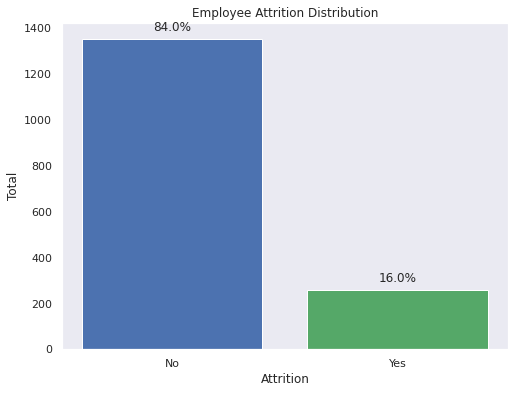

In [47]:
#Calculamos los porcentajes
total_employees=len(df_report)
no_attrition=len(df_report[df_report['Attrition'] == 'No'])
yes_attrition=len(df_report[df_report['Attrition'] == 'Yes'])

no_attrition_percent=(no_attrition / total_employees) * 100
yes_attrition_percent=(yes_attrition / total_employees) * 100

#Imprimimos los resultados
print(f"No Attrition: {no_attrition_percent:.1f}%")
print(f"Yes Attrition: {yes_attrition_percent:.1f}%")

#Creamos del gráfico
attrition_counts = df_report['Attrition'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(attrition_counts.index, attrition_counts.values, color=['#4c72b0', '#55a868'])
plt.title('Employee Attrition Distribution')
plt.xlabel('Attrition')
plt.ylabel('Total')

#Colocamos el % en la gráfica
for i, count in enumerate(attrition_counts.values):
    plt.text(i, count + 20, f'{(count / total_employees) * 100:.1f}%', ha='center', va='bottom')
plt.show()

Observaciones:

- La gran mayoría de los empleados no han dejado la empresa, alrededor del 84%.

- Una menor proporción de empleados sí han dejado la empresa, alrededor del 16%.

Conclusiones:

- **Baja tasa de deserción:** la empresa presenta una baja tasa de deserción, con un número significativamente mayor de empleados que permanecen en la empresa en comparación con aquellos que la han dejado.

- **Retención de empleados:** la alta cantidad de empleados que siguen en la empresa sugiere que ésta puede tener estrategias de retención de empleados efectivas, o un ambiente laboral favorable que fomenta la permanencia de los empleados.

🔍 2. ¿Existe una relación entre la distancia desde el hogar (Distance_from_home) y la deserción de empleados?

Text(0.95, 0.9, 'Yes Attrition: 16.0%')

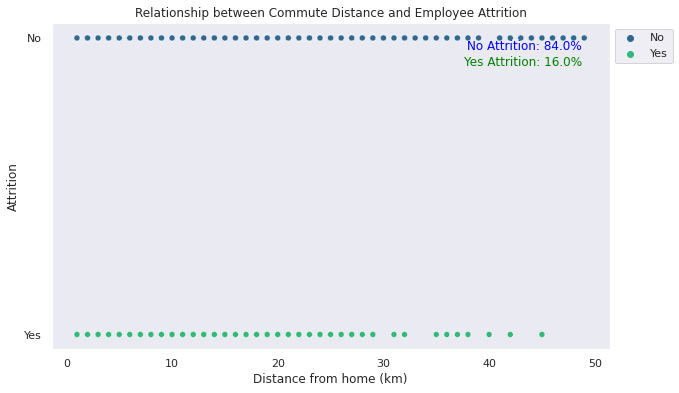

In [48]:
# Cálculo de los porcentajes de deserción
total_employees = len(df_report)
no_attrition = len(df_report[df_report['Attrition'] == 'No'])
yes_attrition = len(df_report[df_report['Attrition'] == 'Yes'])

no_attrition_percent = (no_attrition / total_employees) * 100
yes_attrition_percent = (yes_attrition / total_employees) * 100

# Creación del gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_report, x='Distance_from_home', y='Attrition', hue='Attrition', palette='viridis')
plt.title('Relationship between Commute Distance and Employee Attrition')
plt.xlabel('Distance from home (km)')
plt.ylabel('Attrition')

# Mover la leyenda hacia arriba
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Añadiendo los porcentajes como anotación en la parte superior derecha del gráfico
plt.annotate(f'No Attrition: {no_attrition_percent:.1f}%', xy=(0.95, 0.95), xycoords='axes fraction', ha='right', va='top', fontsize=12, color='blue')
plt.annotate(f'Yes Attrition: {yes_attrition_percent:.1f}%', xy=(0.95, 0.90), xycoords='axes fraction', ha='right', va='top', fontsize=12, color='green')


Observaciones:
- **Tendencia general:** Parece haber una relación positiva entre la distancia al trabajo y las bajas de empleados. Esto significa que, según incrementa la distancia, también aumentan las probabilidades de que el trabajador abandone la compañía.

Conclusiones:

- Los desplazamientos más largos suelen derivar en un mayor desembolso económico, más tiempo de entre traslados, mayor estres y menor equilibrio en la conciliación laboral, lo que puede contribuir a la insatisfacción del trabajador.

- Se podría considerar algún tipo de estrategia de compensación para que estos trabajos vean nivelados los aspectos negativos.

🔍 ¿Cuál es la distribución de los empleados que trabajan en remoto vs los que no, y su relación con la deserción?

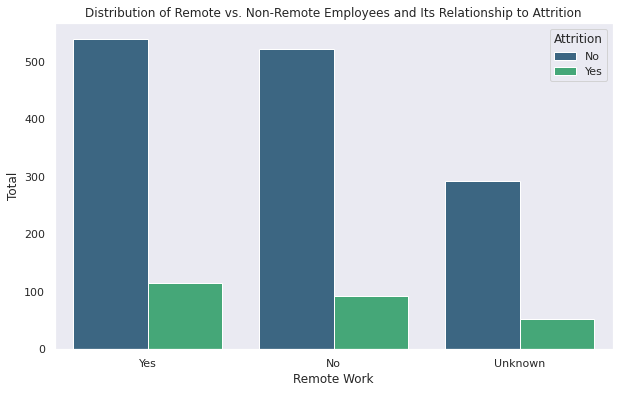

In [49]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_report, x='Remote_work', hue='Attrition', palette='viridis')
plt.title('Distribution of Remote vs. Non-Remote Employees and Its Relationship to Attrition')
plt.xlabel('Remote Work')
plt.ylabel('Total')
plt.legend(title='Attrition');

Observaciones:

- Aproximadamente, la cantidad de trabajadores en remoto y no en remoto es similar.

- La gran mayoría de los empleados remotos no han dejado la empresa.

- Una minoría de empleados remotos han dejado la empresa.

Conclusiones:

- Independientemente de si trabaja en remoto o en presencial, la mayoría de los empleados tiende a quedarse en la empresa.

- Existe un número considerable de 'Unknown', lo que podría indicar falta de datos o situaciones laborales especiales que no están claramente categorizadas.

🔍 Distribución de las bajas según Age

/tmp/ipykernel_523/3138481968.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, value, f"{attrition_age_category_percentages[i]:.2f}%", ha='center', va='bottom')


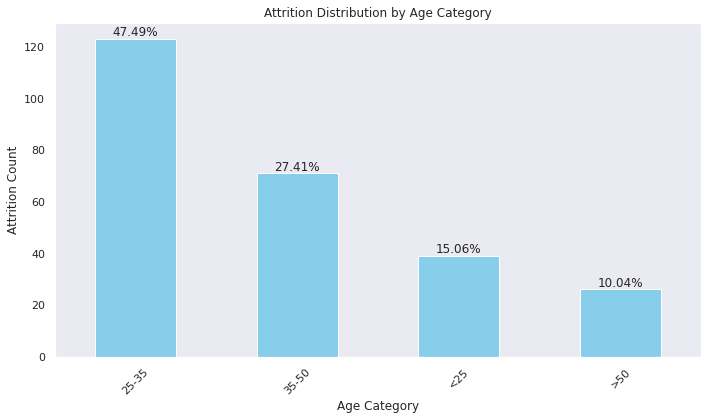

In [50]:
# Definir las categorías de edad
bins = [0, 25, 35, 50, float('inf')]
labels = ['<25', '25-35', '35-50', '>50']

# Agrupar los empleados por categorías de edad
df_report['Age_Category'] = pd.cut(df_report['Age'], bins=bins, labels=labels, right=False)

# Calcular el recuento de bajas por categoría de edad
attrition_age_category_counts = df_report[df_report['Attrition'] == 'Yes']['Age_Category'].value_counts()

# Calcular los porcentajes de bajas por categoría de edad
attrition_age_category_percentages = (attrition_age_category_counts / attrition_age_category_counts.sum()) * 100

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
attrition_age_category_counts.plot(kind='bar', color='skyblue')
plt.title('Attrition Distribution by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Attrition Count')

# Anotar los porcentajes en el gráfico
for i, value in enumerate(attrition_age_category_counts):
    plt.text(i, value, f"{attrition_age_category_percentages[i]:.2f}%", ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()

Observaciones:
- **Grupo de edad con mayor % de bajas:** hay un claro desmarque para el grupo de empleados de entre 25 y 35 años, que acumulan una tasa de abandono del 47%.

- **Grupo de edad con mayor % de retención:** en el extremo opuesto están los mayores de 50, con un porcentaje de bajas de apenas el 10%.

Conclusiones:
- Hay una clara relación entre la edad y el abandono, siendo los grupos de entrer 25 y 50 años los que suman casi el 75% de las bajas. Esto podría deberse a factores como la conciliación familiar y laboral, estancamiento profesional o insatisfacción con la cultura de la compañía.

- Se podría decir que la edad es un factor clave en la retención de empleados y que es necesaria una estrategia de retención de empleados específica para revertir esa tendencia.


Distribución de las bajas según Education

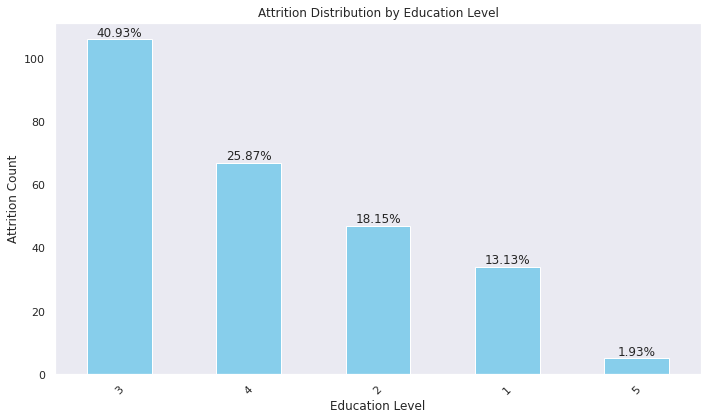

In [51]:
# Calcular el recuento de bajas por nivel de educación
attrition_education_counts = df_report[df_report['Attrition'] == 'Yes']['Education'].value_counts()

# Calcular los porcentajes de bajas por nivel de educación
attrition_education_percentages = (attrition_education_counts / attrition_education_counts.sum()) * 100

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
attrition_education_counts.plot(kind='bar', color='skyblue')
plt.title('Attrition Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Attrition Count')

# Anotar los porcentajes en el gráfico
for i, (education_level, count) in enumerate(attrition_education_counts.items()):
    percentage = attrition_education_percentages[education_level]
    plt.text(i, count, f"{percentage:.2f}%", ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Observaciones:
- **Nivel educativo con más bajas:** el nivel 3, con más del 40% de bajas.

- **Nivel educativo con menos bajas:** el nivel 5, con menos del 2%.

Conclusiones:
- Los empleados con niveles medianos (2, 3 y 4) son los que más tienden a irse. Mientras con los extremos (1 y 5) cuentan con una mayor retención.

- Aquellos con el nivel educativo más alto son los que menos bajas causan.

- Se puede deducir, entonces, que el nivel educativo es un factor importante en la rotación de trabajadores, por lo que se podrían considerar estrategias de retención específicas para los niveles 2, 3 y 4.


Distribución de empleados por Gender.

In [52]:
# Calcular el total de empleados
total_employees = len(df_report)

# Calcular el total de hombres y mujeres
total_male_employees = df_report[df_report['Gender'] == 'Male'].shape[0]
total_female_employees = df_report[df_report['Gender'] == 'Female'].shape[0]

# Calcular el total de bajas
total_attrition = len(df_report[df_report['Attrition'] == 'Yes'])

# Calcular el total de bajas para hombres y mujeres
attrition_male_employees = len(df_report[(df_report['Attrition'] == 'Yes') & (df_report['Gender'] == 'Male')])
attrition_female_employees = len(df_report[(df_report['Attrition'] == 'Yes') & (df_report['Gender'] == 'Female')])

# Calcular los porcentajes redondeados a 2 decimales
percentage_male_employees = round((total_male_employees / total_employees) * 100, 2)
percentage_female_employees = round((total_female_employees / total_employees) * 100, 2)
percentage_attrition_male = round((attrition_male_employees / total_attrition) * 100, 2)
percentage_attrition_female = round((attrition_female_employees / total_attrition) * 100, 2)

# Imprimir resultados
print("Total Employees:", total_employees)
print("Total Male Employees:", total_male_employees)
print("Percentage of Male Employees:", percentage_male_employees)
print('----------------------')
print("Total Female Employees:", total_female_employees)
print("Percentage of Female Employees:", percentage_female_employees)
print('----------------------')
print('----------------------')
print("Total Attrition:", total_attrition)
print("Attrition - Male Employees:", attrition_male_employees)
print("Attrition - Female Employees:", attrition_female_employees)
print('----------------------')
print("Percentage of Attrition - Male Employees:", percentage_attrition_male)
print("Percentage of Attrition - Female Employees:", percentage_attrition_female)

Total Employees: 1614
Total Male Employees: 971
Percentage of Male Employees: 60.16
----------------------
Total Female Employees: 643
Percentage of Female Employees: 39.84
----------------------
----------------------
Total Attrition: 259
Attrition - Male Employees: 163
Attrition - Female Employees: 96
----------------------
Percentage of Attrition - Male Employees: 62.93
Percentage of Attrition - Female Employees: 37.07


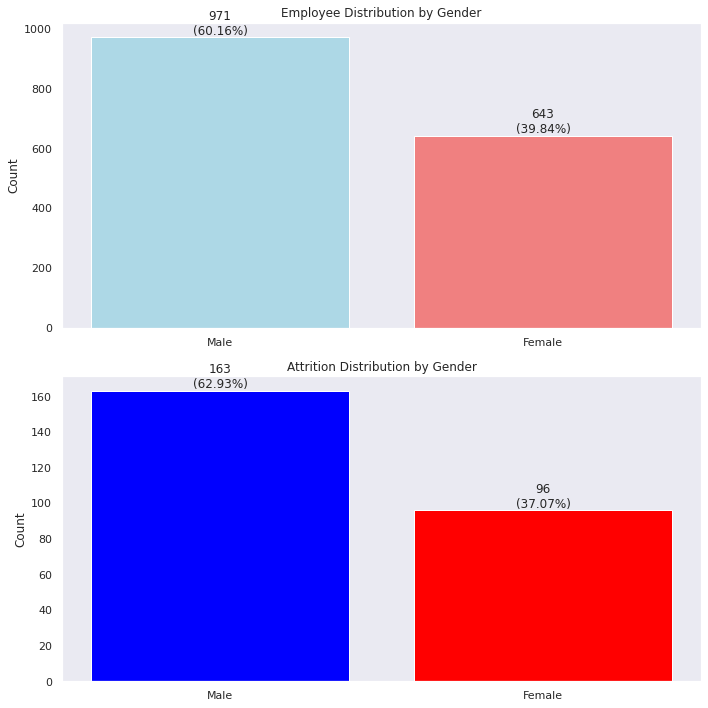

In [53]:
# Calcular porcentajes redondeados a 2 decimales
percentage_male_employees = round((total_male_employees / total_employees) * 100, 2)
percentage_female_employees = round((total_female_employees / total_employees) * 100, 2)
percentage_attrition_male = round((attrition_male_employees / total_attrition) * 100, 2)
percentage_attrition_female = round((attrition_female_employees / total_attrition) * 100, 2)

# Configuración de subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Gráfico 1: Distribución de empleados por género
ax1.bar(['Male', 'Female'], [total_male_employees, total_female_employees], color=['lightblue', 'lightcoral'])
ax1.set_title('Employee Distribution by Gender')
ax1.set_ylabel('Count')

# Anotar los valores y porcentajes en el gráfico 1
for i, value in enumerate([total_male_employees, total_female_employees]):
    ax1.text(i, value, f"{value}\n({percentage_male_employees if i == 0 else percentage_female_employees}%)", ha='center', va='bottom')

# Gráfico 2: Distribución de bajas por género
ax2.bar(['Male', 'Female'], [attrition_male_employees, attrition_female_employees], color=['blue', 'red'])
ax2.set_title('Attrition Distribution by Gender')
ax2.set_ylabel('Count')

# Anotar los valores y porcentajes en el gráfico 2
for i, value in enumerate([attrition_male_employees, attrition_female_employees]):
    ax2.text(i, value, f"{value}\n({percentage_attrition_male if i == 0 else percentage_attrition_female}%)", ha='center', va='bottom')

plt.tight_layout()
plt.show()

Observaciones:
- **Distribución desigual:** hay una clara desproporción entre hombres y mujeres trabajadores en la empresa, siendo ellos un 60% y ellas un 40%, aproximadamente.

- Una proporción similar siguen las bajas, siendo superior en los hombres que en las mujeres.

Conclusiones:
- Sería oportuno considerar implementar alguna estrategia de inclusión y paridad de género.

Distribución de las bajas según Job_level

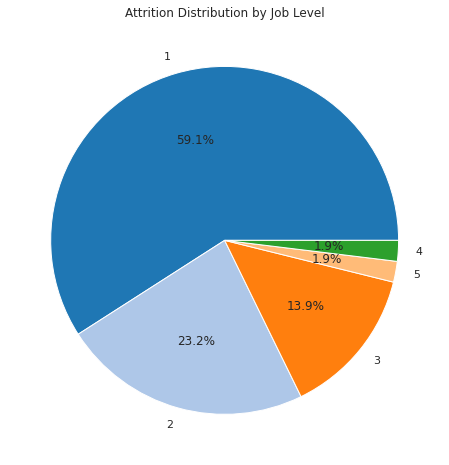

In [54]:
# Calcular el recuento de bajas por nivel de trabajo
attrition_job_level_counts = df_report[df_report['Attrition'] == 'Yes']['Job_level'].value_counts()

# Calcular los porcentajes de bajas por nivel de trabajo
attrition_job_level_percentages = (attrition_job_level_counts / attrition_job_level_counts.sum()) * 100

# Crear un gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(attrition_job_level_counts, labels=attrition_job_level_counts.index, autopct='%1.1f%%', colors=plt.cm.tab20.colors)
plt.title('Attrition Distribution by Job Level')

plt.show()

Observaciones:

- El nivel con mayor proporción de bajas es el nivel 1, que concentra más de la mitad de las bajas.

- Los niveles con mayor retención son los niveles 4 y 5.


Conclusiones:

- Hay una clara relación entre el nivel del puesto de trabajo y la retención laboral: a menor nivel mayor número de bajas.

- En el extremo opuesto se encuentran los nivels 4 y 5, con menos de un 2% de bajas cada uno, lo que indica que las acciones que esté tomando la empresa para mantener a estos perfiles está funcionando.

**************** Eliminar porque no aporta nada, la mayoría son unknown y el resto más o menos igual
Distribución de las bajas según Over_time

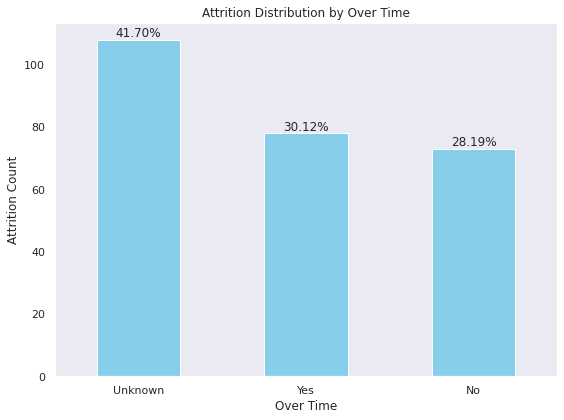

In [55]:
# Calcular la cantidad de empleados que se fueron según la columna Over_time
attrition_over_time_counts = df_report[df_report['Attrition'] == 'Yes']['Over_time'].value_counts()

# Calcular los porcentajes de empleados que se fueron según la columna Over_time
attrition_over_time_percentages = (attrition_over_time_counts / attrition_over_time_counts.sum()) * 100

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
attrition_over_time_counts.plot(kind='bar', color='skyblue')
plt.title('Attrition Distribution by Over Time')
plt.xlabel('Over Time')
plt.ylabel('Attrition Count')

# Anotar los porcentajes en el gráfico
for i, (over_time, count) in enumerate(attrition_over_time_counts.items()):
    percentage = attrition_over_time_percentages[over_time]
    plt.text(i, count, f"{percentage:.2f}%", ha='center', va='bottom')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Distribución de las bajas según Percent_salary_hike

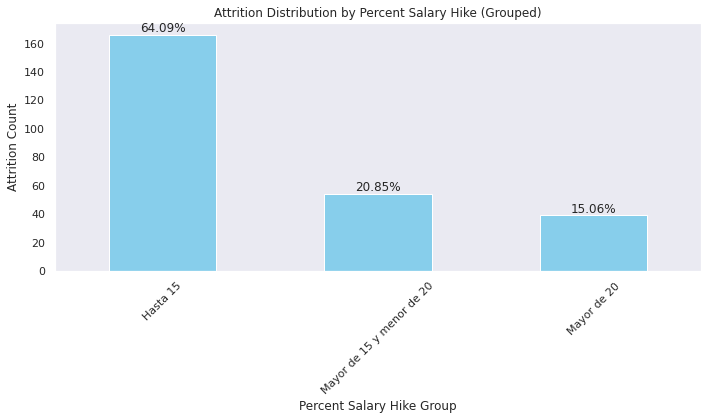

In [56]:
# Agrupar los valores de Percent_salary_hike
def group_salary_hike(percent):
    if percent <= 15:
        return 'Hasta 15'
    elif percent > 15 and percent < 20:
        return 'Mayor de 15 y menor de 20'
    else:
        return 'Mayor de 20'

# Aplicar la función de agrupación
df_report['Percent_salary_hike_grouped'] = df_report['Percent_salary_hike'].apply(group_salary_hike)

# Calcular la cantidad de empleados que se han ido según el Percent_salary_hike agrupado
attrition_percent_salary_hike_grouped_counts = df_report[df_report['Attrition'] == 'Yes']['Percent_salary_hike_grouped'].value_counts()

# Calcular los porcentajes de empleados que se han ido según el Percent_salary_hike agrupado
attrition_percent_salary_hike_grouped_percentages = (attrition_percent_salary_hike_grouped_counts / attrition_percent_salary_hike_grouped_counts.sum()) * 100

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
attrition_percent_salary_hike_grouped_counts.plot(kind='bar', color='skyblue')
plt.title('Attrition Distribution by Percent Salary Hike (Grouped)')
plt.xlabel('Percent Salary Hike Group')
plt.ylabel('Attrition Count')

# Anotar los porcentajes en el gráfico
for i, (percent_salary_hike_group, count) in enumerate(attrition_percent_salary_hike_grouped_counts.items()):
    percentage = attrition_percent_salary_hike_grouped_percentages[percent_salary_hike_group]
    plt.text(i, count, f"{percentage:.2f}%", ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Observaciones:
- **Grupo con más bajas:** aquellos empleados que reciben un aumento salarial del 15% o menos son los que más abandonan la empresa, triplicando al siguiente grupo.

- Por otro lado, el grupo que más retención tiene es el de aquellos trabajadores que reciben aumentos superiores al 20%.

Conclusiones:
- Se puede concluir en que el porcentaje de aumennto salarial es un factor importante en la valoración del empleado a la hora de continuar en la empresa.

- Se podrían considerar estrategias de compensación competitiva para mantener a ese grupo con mayor probabilidad de abandono.

Distribución de las bajas según Performance_rating

In [57]:
df_report['Performance_rating'].unique()

array([3.  , 4.  , 3.15])

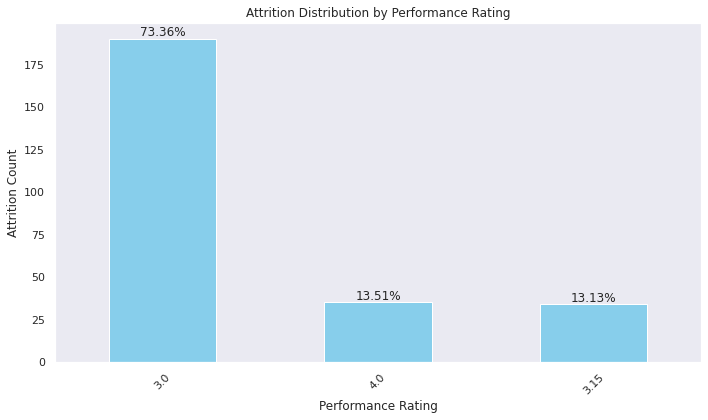

In [58]:
# Calcular el recuento de bajas por nivel de performance
attrition_performance_counts = df_report[df_report['Attrition'] == 'Yes']['Performance_rating'].value_counts()

# Calcular los porcentajes de bajas por nivel de performance
attrition_performance_percentages = (attrition_performance_counts / attrition_performance_counts.sum()) * 100

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
attrition_performance_counts.plot(kind='bar', color='skyblue')
plt.title('Attrition Distribution by Performance Rating')
plt.xlabel('Performance Rating')
plt.ylabel('Attrition Count')

# Anotar los porcentajes en el gráfico
for i, (performance_rating, count) in enumerate(attrition_performance_counts.items()):
    percentage = attrition_performance_percentages[performance_rating]
    plt.text(i, count, f"{percentage:.2f}%", ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Observaciones:
- Se observan dos grupos claramente distinguidos, aquellos con una performance de 3, que representan un 73% de las bajas, y aquellos con una performance de 4, siendo menos del 12% de las bajas.

- El grupo con una valoración de 3.15 corresponde a aquellos trabajadores que no tenían puntuación y se hizo una estimación con la media.

Conclusiones: 
- Hay una clara relación entre una baja valoración y el índice de bajas. Es posible que ese bajo rendimiento se deba a un descontento producido por varios factores, por ejemplo, la conciliación laboral o la remuneración.

- Sería positivo realizar un análisis más preciso para identificar esas correlaciones y poder ajustar una estrategia para mantener a ese grupo de trabajadores más contento y, por tanto, más productivo.

Distribución de las bajas según Training_times_last_year

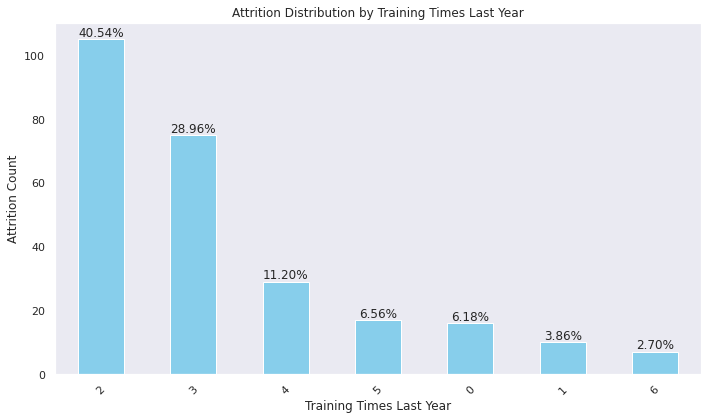

In [59]:
# Calcular el recuento de bajas por nivel de entrenamiento
attrition_training_counts = df_report[df_report['Attrition'] == 'Yes']['Training_times_last_year'].value_counts()

# Calcular los porcentajes de bajas por nivel de entrenamiento
attrition_training_percentages = (attrition_training_counts / attrition_training_counts.sum()) * 100

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
attrition_training_counts.plot(kind='bar', color='skyblue')
plt.title('Attrition Distribution by Training Times Last Year')
plt.xlabel('Training Times Last Year')
plt.ylabel('Attrition Count')

# Anotar los porcentajes en el gráfico
for i, (training_times, count) in enumerate(attrition_training_counts.items()):
    percentage = attrition_training_percentages[training_times]
    plt.text(i, count, f"{percentage:.2f}%", ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()

Observaciones:
- Los trabajadores que recibieron 2 o 3 formaciones son los que más bajas han causado, siendo más del 69% del total.
- Curiosamente aquellos con solo 0 o 1 acción formativa representan un porcentaje bajo de abandono, apenas un 10% entre ambos.

Conclusiones:
- El hecho de que los trabajadores que menos formaciones han recibido sean de los que menos dejan la empresa hace pensar que tendrán un grado alto de satisfacción general en el trabajo y se sientan compensados en otros aspectos como, por ejemplo, el salario o las condiciones laborales.

Distribución de las bajas según Work_life_balance (este puede ir de la mano del de las edades)

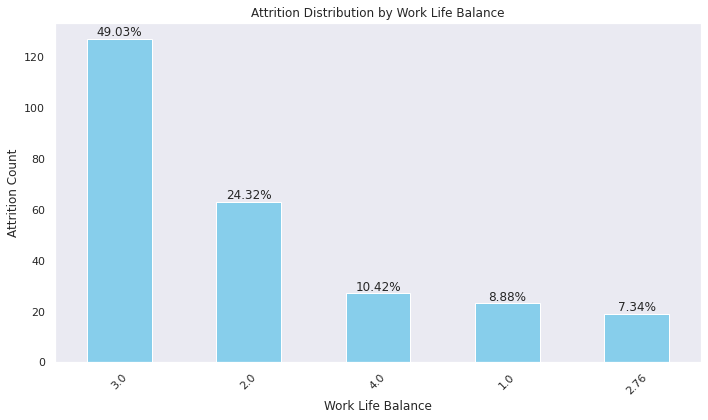

In [60]:
# Calcular el recuento de bajas por nivel de Work_life_balance
attrition_work_life_balance_counts = df_report[df_report['Attrition'] == 'Yes']['Work_life_balance'].value_counts()

# Calcular los porcentajes de bajas por nivel de Work_life_balance
attrition_work_life_balance_percentages = (attrition_work_life_balance_counts / attrition_work_life_balance_counts.sum()) * 100

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
attrition_work_life_balance_counts.plot(kind='bar', color='skyblue')
plt.title('Attrition Distribution by Work Life Balance')
plt.xlabel('Work Life Balance')
plt.ylabel('Attrition Count')

# Anotar los porcentajes en el gráfico
for i, (work_life_balance, count) in enumerate(attrition_work_life_balance_counts.items()):
    percentage = attrition_work_life_balance_percentages[work_life_balance]
    plt.text(i, count, f"{percentage:.2f}%", ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Observaciones:
- La tasa de rotación es superior para los trabajadores con un equilibrio en la conciliación laboral y personal de 2 y 3, sumando entre ambos un 73% del total de bajas y siendo concretamente los que valoraron su conciliación con un 3 los que más abandonan, con un 49% del total.

- No obstante, los trabajadores que valoraron su equilibrio con tan solo un punto no llegan al 9% de las bajas, lo que hace pensar que encuentren satisfacción en algún otro aspecto como, por ejemplo, la remuneración.

- El grupo de 2.76 son aquellos valores que eran nuelos y que se cubrieron con la media.

Conclusiones:
- Sería indicado diseñar una estrategia para mejorar ese equilibrio entre la vida personal y laboral para aquellos que se encuentran en el rango del medio, quizás observando qué hace que los que tienen un equilibrio de 1 sí se queden en la empresa.

Distribución de las bajas según Years_at_company

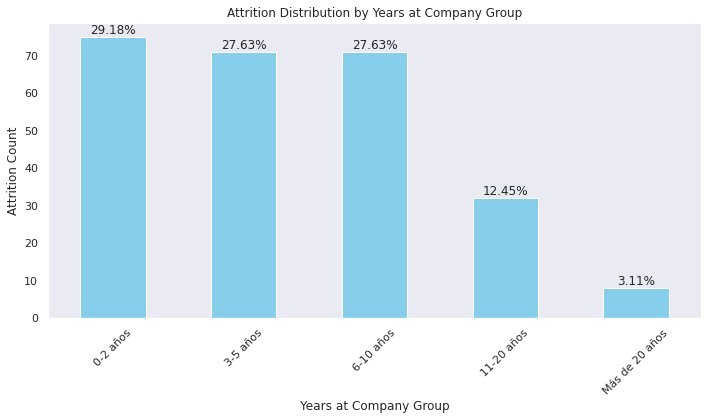

In [62]:

# Definir los grupos de años en la compañía
bins = [0, 2, 5, 10, 20, df_data['Years_at_company'].max()]
labels = ['0-2 años', '3-5 años', '6-10 años', '11-20 años', 'Más de 20 años']

# Crear una nueva columna en el DataFrame para los rangos de años
df_data['Years_at_company_group'] = pd.cut(df_data['Years_at_company'], bins=bins, labels=labels, right=False)

# Filtrar los datos para obtener solo los empleados que se han ido (Attrition == 'Yes')
attrition_data = df_data[df_data['Attrition'] == 'Yes']

# Calcular el recuento de bajas por grupo de años en la compañía
attrition_years_group_counts = attrition_data['Years_at_company_group'].value_counts().sort_index()

# Calcular los porcentajes de bajas por grupo de años en la compañía
attrition_years_group_percentages = (attrition_years_group_counts / attrition_years_group_counts.sum()) * 100

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
attrition_years_group_counts.plot(kind='bar', color='skyblue')
plt.title('Attrition Distribution by Years at Company Group')
plt.xlabel('Years at Company Group')
plt.ylabel('Attrition Count')

# Anotar los porcentajes en el gráfico
for i, value in enumerate(attrition_years_group_counts):
    percentage = attrition_years_group_percentages.iloc[i]
    plt.text(i, value, f"{percentage:.2f}%", ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Observaciones:
- Los empleados que llevan en la compañía 10 años o menos son los que más bajas causan, acumulando un total de casi el 85% de los abondonos totales. Ese gran grupo se puede dividir en tres grupos más pequeños pero con un porcentaje de rotación similar, en torno a 28% cada uno.

- En el extremo opuesto están los trabajadores que llevan más de 20 años y que apenas acumulan el 3% de las bajas.

Conclusiones:
- Hay una clara relación entre la antigüedad y la permanencia, y un linde también muy claro: a partir de los 10 años, la rotación baja muy considerablemente.

- Sería interesante analizar qué hacer que aquellos más veteranos opten por quedarse y, quizás, adaptar una estrategia específica para conseguir retener a los menos antiguos.

Distribución de las bajas según Years_since_last_promotion

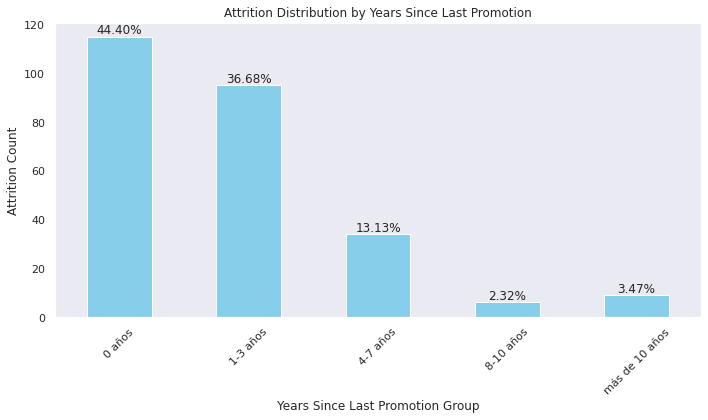

In [65]:
# Definir las categorías de agrupación
bins = [-1, 0, 3, 7, 10, float('inf')]
labels = ['0 años', '1-3 años', '4-7 años', '8-10 años', 'más de 10 años']

# Crear una nueva columna en el DataFrame con las categorías
df_data['Promotion_Years_Group'] = pd.cut(df_data['Years_since_last_promotion'], bins=bins, labels=labels)

# Calcular el recuento de bajas por grupo de años desde la última promoción
attrition_promotion_counts = df_data[df_data['Attrition'] == 'Yes']['Promotion_Years_Group'].value_counts().sort_index()

# Calcular los porcentajes de bajas por grupo de años desde la última promoción
attrition_promotion_percentages = (attrition_promotion_counts / attrition_promotion_counts.sum()) * 100

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
attrition_promotion_counts.plot(kind='bar', color='skyblue')
plt.title('Attrition Distribution by Years Since Last Promotion')
plt.xlabel('Years Since Last Promotion Group')
plt.ylabel('Attrition Count')

# Anotar los porcentajes en el gráfico
for i, (group, count) in enumerate(attrition_promotion_counts.items()):
    percentage = attrition_promotion_percentages[group]
    plt.text(i, count, f"{percentage:.2f}%", ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Observaciones:
- El grupo de 0 años representa a aquellos que nunca han sido ascendidos, que suponen cerca de la mitad de las bajas, el 44%.

- El siguiente grupo es el que tiene su último ascenso más cerca, 3 años o menos, siendo el 36% de los abandonos.

- Para los trabajadores que tuvieron su último ascenso hace más tiempo son los que más permanencia tienen. Esto hace pensar que están muy satisfechos con su puesto actual o que sienten compensación en otros factores.

Conclusiones:
- Sería aconsejable identificar qué otros factores están influyendo en los empleados que hace 3 años o menos que recibieron un ascenso pero deciden marcharse.

- También se podría considerar alguna acción específica para aquellos que nunca recibieron un ascenso, estudiar el motivo (quizás llevan muy poco tiempo en la empresa, o quizás se pueda impartir alguna formación que les permita avanzar en su carrera laboral dentro de la empresa).

Distribución de las bajas según satisfacción (coger el csv de la fase 4)

Existen tres columnas que miden distintos tipos de satisfacción del empleado (environment, job y relationship).

En la fase 4, para el ejercicio de A/B Testing hemos creado una nueva columna que calcula la media de esos tres tipos de satisfacción, pudiendo medir así el grado de satisfacción general de los trabajadores. Vamos a recuperar ese csv para conocer la distribución de las bajas según el grado de satisfacción.

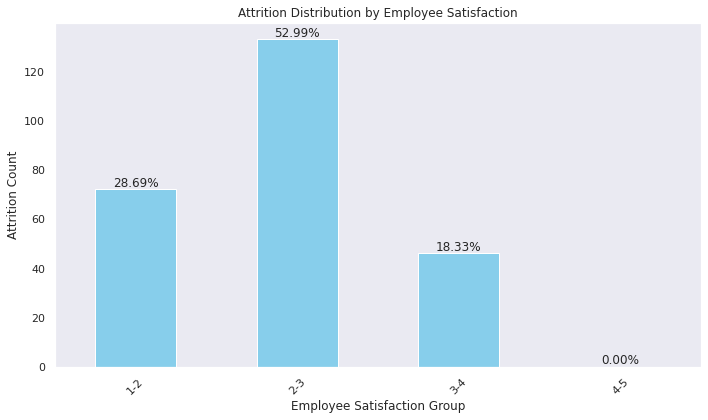

In [67]:
# Define las categorías de agrupación para la satisfacción del empleado
satisfaction_bins = [1, 2, 3, 4, 5]
satisfaction_labels = ['1-2', '2-3', '3-4', '4-5']

# Crea una nueva columna en el DataFrame con las categorías de satisfacción del empleado
df_data['Employee_Satisfaction_Group'] = pd.cut(df_satisfaction['Employee_satisfaction'], bins=satisfaction_bins, labels=satisfaction_labels)

# Calcular el recuento de bajas por grupo de satisfacción del empleado
attrition_satisfaction_counts = df_data[df_data['Attrition'] == 'Yes']['Employee_Satisfaction_Group'].value_counts().sort_index()

# Calcular los porcentajes de bajas por grupo de satisfacción del empleado
attrition_satisfaction_percentages = (attrition_satisfaction_counts / attrition_satisfaction_counts.sum()) * 100

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
attrition_satisfaction_counts.plot(kind='bar', color='skyblue')
plt.title('Attrition Distribution by Employee Satisfaction')
plt.xlabel('Employee Satisfaction Group')
plt.ylabel('Attrition Count')

# Anotar los porcentajes en el gráfico
for i, (group, count) in enumerate(attrition_satisfaction_counts.items()):
    percentage = attrition_satisfaction_percentages[group]
    plt.text(i, count, f"{percentage:.2f}%", ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Observaciones:
- Los trabajadores con un nivel de satisfacción global son los más fieles, representando únicamente un 18% de las bajas.

- El grupo que más abandonos causa es el de empleados con un nivel de satisfacción global entrer 2 y 3, siendo el 53% del total de bajas.

Conclusiones:
- 

**********************recopilar todos los puntos a mejorar para agruparlos y pensar estrategias que se puedan aplicar conjuntamente